# Rain in Australia

### Installing packages

In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
library(forcats)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

### Loading data

In [2]:
aussie <- read_csv("https://github.com/geoffreyyang/dsci100-002-group7/raw/main/data/weatherAUS.csv")
aussie_factored <- aussie %>%
    mutate(RainToday = as.factor(RainToday), 
          RainTomorrow = as.factor(RainTomorrow))
glimpse(aussie_factored)

Parsed with column specification:
cols(
  .default = col_double(),
  Date = col_date(format = ""),
  Location = col_character(),
  Evaporation = col_logical(),
  Sunshine = col_logical(),
  WindGustDir = col_character(),
  WindDir9am = col_character(),
  WindDir3pm = col_character(),
  RainToday = col_character(),
  RainTomorrow = col_character()
)

See spec(...) for full column specifications.

Warning message:
“153782 parsing failures.
 row         col           expected actual                                                                              file
6050 Evaporation 1/0/T/F/TRUE/FALSE   12   'https://github.com/geoffreyyang/dsci100-002-group7/raw/main/data/weatherAUS.csv'
6050 Sunshine    1/0/T/F/TRUE/FALSE   12.3 'https://github.com/geoffreyyang/dsci100-002-group7/raw/main/data/weatherAUS.csv'
6051 Evaporation 1/0/T/F/TRUE/FALSE   14.8 'https://github.com/geoffreyyang/dsci100-002-group7/raw/main/data/weatherAUS.csv'
6051 Sunshine    1/0/T/F/TRUE/FALSE   13   'https://github

Rows: 145,460
Columns: 23
$ Date          <date> 2008-12-01, 2008-12-02, 2008-12-03, 2008-12-04, 2008-1…
$ Location      <chr> "Albury", "Albury", "Albury", "Albury", "Albury", "Albu…
$ MinTemp       <dbl> 13.4, 7.4, 12.9, 9.2, 17.5, 14.6, 14.3, 7.7, 9.7, 13.1,…
$ MaxTemp       <dbl> 22.9, 25.1, 25.7, 28.0, 32.3, 29.7, 25.0, 26.7, 31.9, 3…
$ Rainfall      <dbl> 0.6, 0.0, 0.0, 0.0, 1.0, 0.2, 0.0, 0.0, 0.0, 1.4, 0.0, …
$ Evaporation   <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ Sunshine      <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ WindGustDir   <chr> "W", "WNW", "WSW", "NE", "W", "WNW", "W", "W", "NNW", "…
$ WindGustSpeed <dbl> 44, 44, 46, 24, 41, 56, 50, 35, 80, 28, 30, 31, 61, 44,…
$ WindDir9am    <chr> "W", "NNW", "W", "SE", "ENE", "W", "SW", "SSE", "SE", "…
$ WindDir3pm    <chr> "WNW", "WSW", "WSW", "E", "NW", "W", "W", "W", "NW", "S…
$ WindSpeed9am  <dbl> 20, 4, 19, 11, 7, 19, 20, 6, 7, 15, 17, 15, 28, 24, 4, …
$ WindSpeed3pm  <dbl> 24, 

### Visualizations

Warning message:
“Removed 15289 rows containing missing values (geom_point).”
Warning message:
“Removed 5274 rows containing missing values (geom_point).”


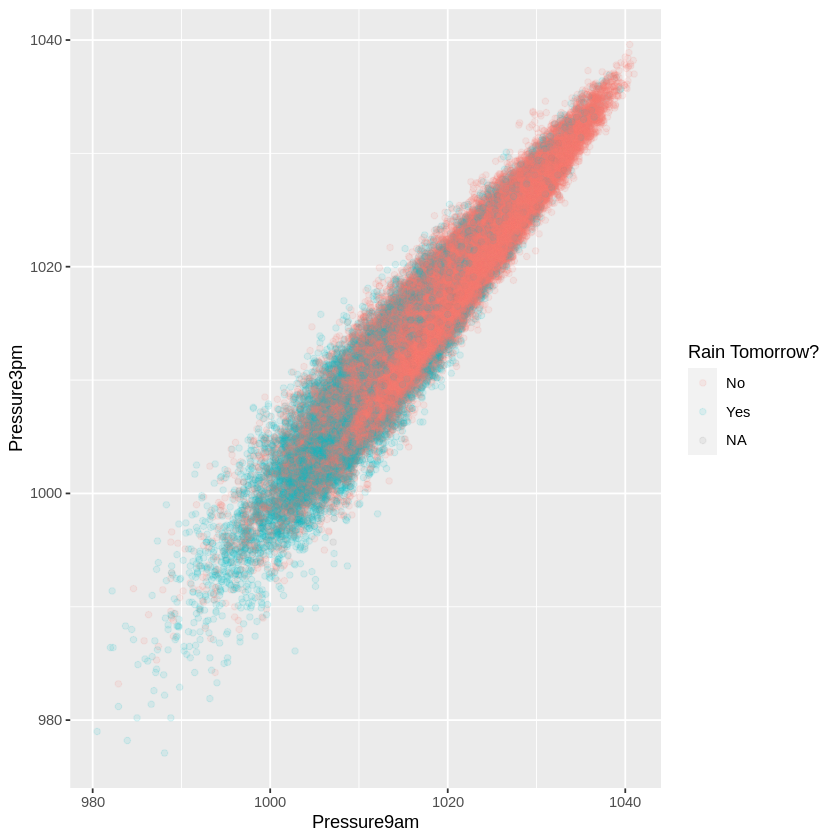

Warning message:
“Removed 63502 rows containing missing values (geom_point).”


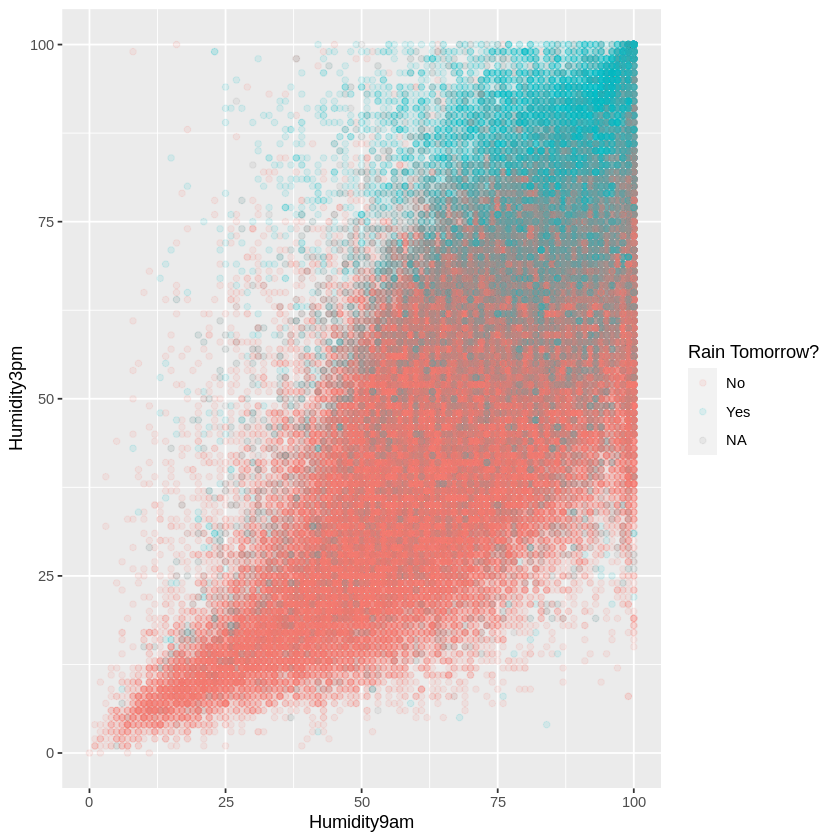

Warning message:
“Removed 3616 rows containing missing values (geom_point).”


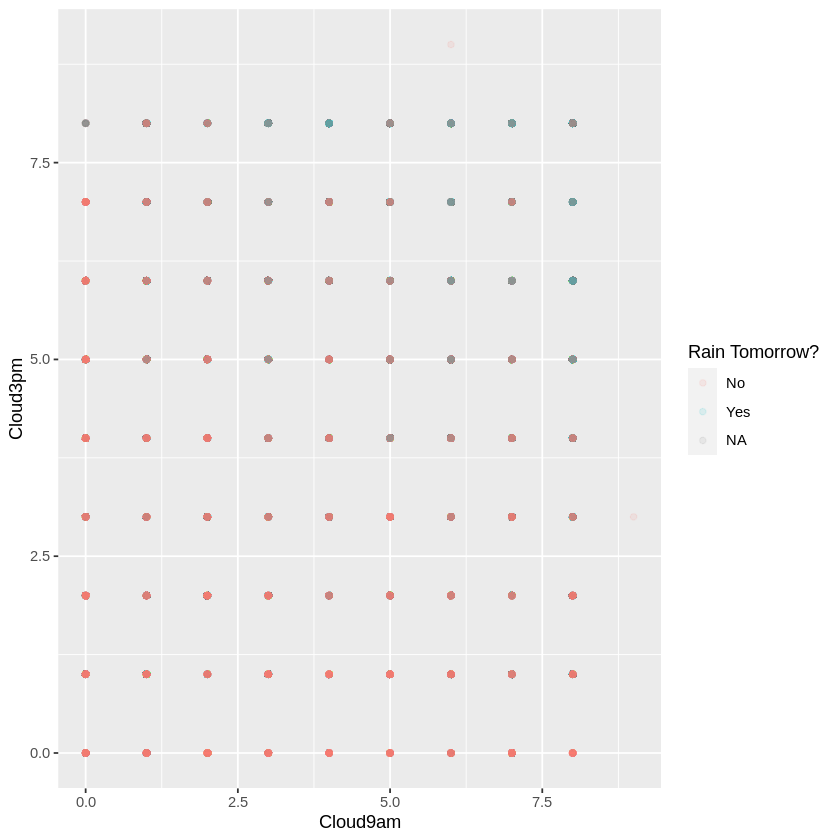

Warning message:
“Removed 4247 rows containing missing values (geom_point).”


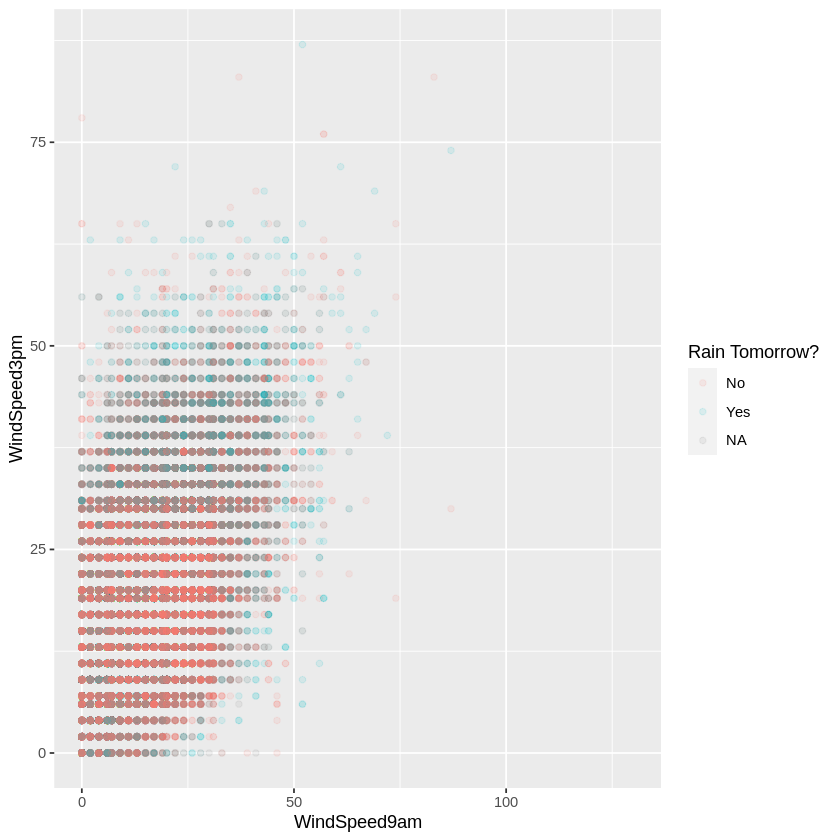

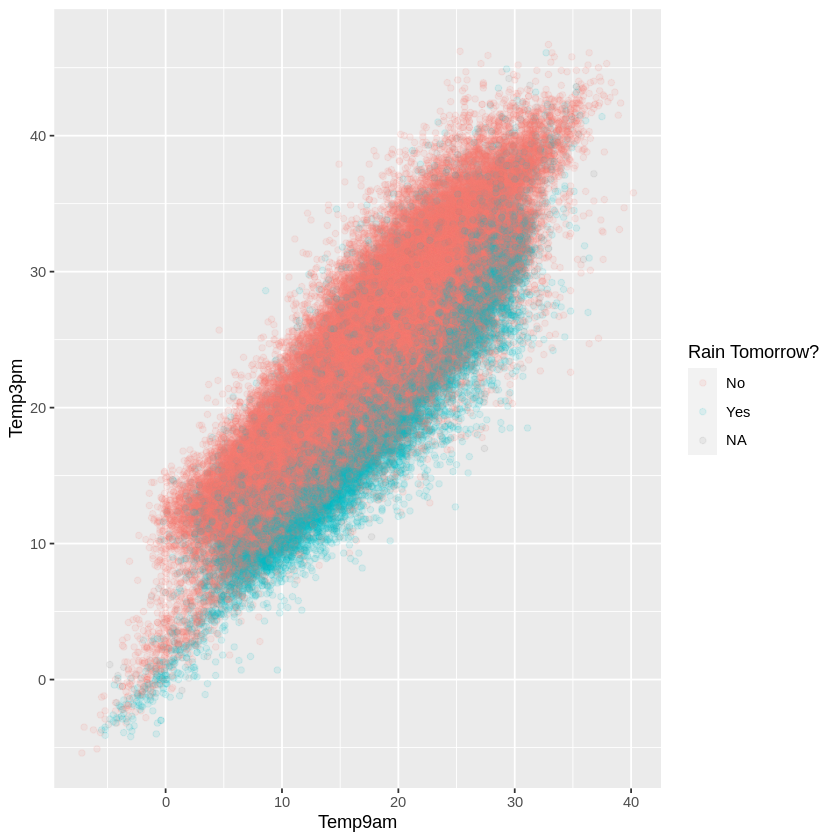

In [3]:
aussie_factored %>% 
    ggplot(aes(x = `Pressure9am`, y = `Pressure3pm`, color = RainTomorrow)) +
    geom_point(alpha = 0.1) +
    labs(color = "Rain Tomorrow?")

aussie_factored %>% 
    ggplot(aes(x = `Humidity9am`, y = `Humidity3pm`, color = RainTomorrow)) +
    geom_point(alpha = 0.1) +
    labs(color = "Rain Tomorrow?")

aussie_factored %>% 
    ggplot(aes(x = `Cloud9am`, y = `Cloud3pm`, color = RainTomorrow)) +
    geom_point(alpha = 0.1) +
    labs(color = "Rain Tomorrow?")

aussie_factored %>% 
    ggplot(aes(x = `WindSpeed9am`, y = `WindSpeed3pm`, color = RainTomorrow)) +
    geom_point(alpha = 0.1) +
    labs(color = "Rain Tomorrow?")

aussie_factored %>% 
    ggplot(aes(x = `Temp9am`, y = `Temp3pm`, color = RainTomorrow)) +
    geom_point(alpha = 0.1) +
    labs(color = "Rain Tomorrow?")